# Time series modelling 2

In [209]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

import xgboost as xgb

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import plot_confusion_matrix

In [210]:
df = pd.read_csv('FE_data_18-19.csv', index_col=0)

# sort by date
df.sort_values(by='Date', inplace=True)

# make date the index
df.set_index('Date',inplace=True)

### SVM(R) with scaling

In [211]:
# split off end of 2019 as test set
test_size = df.shape[0] - 30
train, test = df.iloc[:test_size], df.iloc[test_size:]

# encode location
le = LabelEncoder()
le.fit(train['Location'])
train['Location'] = le.transform(train['Location'])
test['Location'] = le.transform(test['Location'])

X_train, X_test = train.drop(labels=['SsMean','logSsMean'], axis=1), test.drop(labels=['SsMean','logSsMean'], axis=1)
y_train, y_test = train.logSsMean, test.logSsMean

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

svr = SVR()
svr.fit(X_train, y_train)

<ipython-input-211-c345836fbeb9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Location'] = le.transform(train['Location'])
<ipython-input-211-c345836fbeb9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Location'] = le.transform(test['Location'])


SVR()

Training acc: 0.4302876926071345
Testing acc: 0.19718571066170787
Train Mean squared error:  1.8998094459791113
Test Mean squared error:  2.6636996992275024
Train MAE:  0.946381133437546
Test MAE:  1.3639607770820739


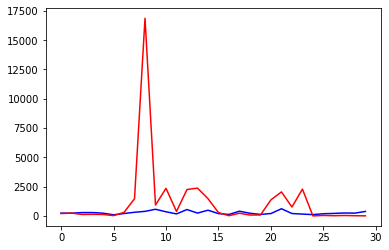

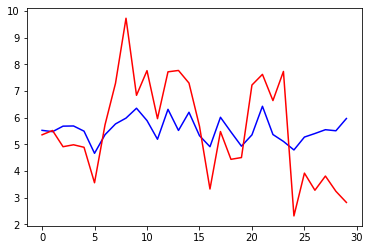

In [215]:
y_pred = svr.predict(X_test)
train_score = svr.score(X_train, y_train.values)
test_score = svr.score(X_test, y_test.values)
print('Training acc:', train_score)
print('Testing acc:', test_score)
train_pred = svr.predict(X_train)

train_mse = mean_squared_error(y_train, train_pred)
print('Train Mean squared error: ', train_mse)
test_mse = mean_squared_error(y_test, y_pred)
print('Test Mean squared error: ', test_mse)

train_mae = mean_absolute_error(y_train, train_pred)
print('Train MAE: ', train_mae)
test_mae = mean_absolute_error(y_test, y_pred)
print('Test MAE: ', test_mae)

plt.plot(np.exp(y_pred), c='b')
plt.plot(np.exp(y_test.values), c='r')
plt.show()

plt.plot(y_pred, c='b')
plt.plot(y_test.values, c='r')
plt.show()

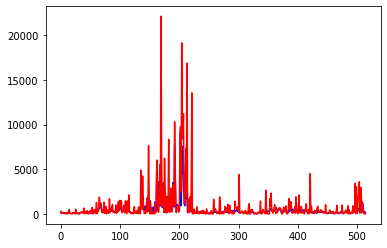

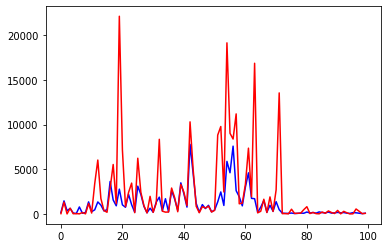

In [103]:
# plot training
plt.plot(np.exp(train_pred), c='b')
plt.plot(np.exp(y_train.values), c='r')
plt.show()

# close up
plt.plot(np.exp(train_pred)[150:250], c='b')
plt.plot(np.exp(y_train.values)[150:250], c='r')
plt.show()

In [111]:
def classify(data):
    if data < 60:
        return 0
    elif data < 250:
        return 1
    elif data < 1000:
        return 2
    elif data >= 1000:
        return 3
    
def from_log(data):
    return np.exp(data)

In [112]:
test_result = pd.DataFrame()
test_result['log_y_pred'] = y_pred
test_result['y_pred'] = test_result.log_y_pred.apply(from_log)
test_result['pred_label'] = test_result.y_pred.apply(classify)
test_result['y'] = y_test.values
test_result['y_log'] = test_result.y.apply(from_log)
test_result['true_label'] = test_result.y_log.apply(classify)

In [113]:
test_result

,log_y_pred,y_pred,pred_label,y,y_log,true_label
0,5.529108,251.918979,2,5.361104,212.960,1
1,5.479985,239.843220,1,5.523219,250.440,2
2,5.686438,294.841602,2,4.915738,136.420,1
3,5.693382,296.896076,2,4.987708,146.600,1
4,5.499038,244.456683,1,4.894626,133.570,1
5,4.668361,106.523035,1,3.563883,35.300,0
6,5.365525,213.903431,1,5.736185,309.880,2
7,5.770091,320.566855,2,7.295593,1473.790,3
8,5.988235,398.710096,2,9.733022,16865.435,3
9,6.358423,577.335435,2,6.843089,937.380,2


In [114]:
cr = classification_report(test_result.true_label, test_result.pred_label)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.19      0.43      0.26         7
           2       0.07      0.17      0.10         6
           3       0.00      0.00      0.00         9

    accuracy                           0.13        30
   macro avg       0.06      0.15      0.09        30
weighted avg       0.06      0.13      0.08        30



/Users/reneehall/opt/anaconda3/envs/lighthouse/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/reneehall/opt/anaconda3/envs/lighthouse/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/reneehall/opt/anaconda3/envs/lighthouse/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

Confusion matrix, without normalization
[[0 6 2 0]
 [0 3 4 0]
 [0 5 1 0]
 [0 2 7 0]]


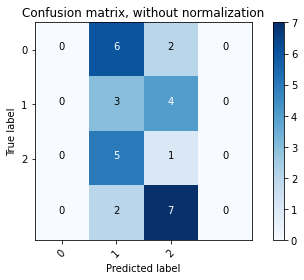

In [115]:
cm = confusion_matrix(test_result.true_label, test_result.pred_label)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=[0,1,2],
                      title='Confusion matrix, without normalization')

## SVR CV grid search

#### Ordered Test Set

In [238]:
test_size = df.shape[0] - 30
train, test = df.iloc[:test_size], df.iloc[test_size:]

X_train, X_test = train.drop(labels=['SsMean','logSsMean'], axis=1), test.drop(labels=['SsMean','logSsMean'], axis=1)
y_train, y_test = train.logSsMean, test.logSsMean

#### Random Test Set

In [232]:
X = df.drop(labels=['SsMean','logSsMean'], axis=1)
y = df.logSsMean

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=46)

#### Model

In [239]:
# encode location
le = LabelEncoder()
le.fit(X_train['Location'])
X_train['Location'] = le.transform(X_train['Location'])
X_test['Location'] = le.transform(X_test['Location'])

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [240]:
from sklearn.model_selection import GridSearchCV

params = {
    'kernel': ['poly','rbf'],
    'degree': [3, 2, 1],
    'gamma': ['scale','auto'],
    'coef0': [0.0, 0.5],
    'C': [1, 1.5],
    'epsilon': [0.05, 0.1]
}

kfolds = 5

clf = GridSearchCV(estimator=SVR(), param_grid=params, cv=kfolds)

In [241]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 1.5], 'coef0': [0.0, 0.5],
                         'degree': [3, 2, 1], 'epsilon': [0.05, 0.1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf']})

In [242]:
best_parameters = clf.best_params_
print(best_parameters)

best_result = clf.best_score_
print(best_result)

{'C': 1, 'coef0': 0.5, 'degree': 1, 'epsilon': 0.05, 'gamma': 'scale', 'kernel': 'poly'}
0.09223445166084832


Training acc: 0.2870100483230663
Testing acc: 0.17274270781847734
Train Mean squared error:  2.3775948448134083
Test Mean squared error:  2.7448004222544866
Train RMSE:  1.5419451497421717
Test RMSE:  1.656743921749673
Train MAE:  1.1285368153758708
Test MAE:  1.3789325781080919


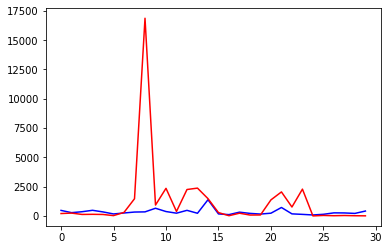

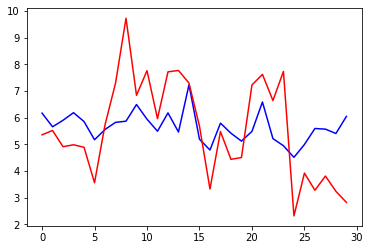

In [243]:
m = clf.best_estimator_

y_pred = m.predict(X_test)
train_score = m.score(X_train, y_train.values)
test_score = m.score(X_test, y_test.values)
print('Training acc:', train_score)
print('Testing acc:', test_score)
train_pred = m.predict(X_train)

train_mse = mean_squared_error(y_train, train_pred)
print('Train Mean squared error: ', train_mse)
test_mse = mean_squared_error(y_test, y_pred)
print('Test Mean squared error: ', test_mse)

train_rmse = mean_squared_error(y_train, train_pred, squared=False)
print('Train RMSE: ', train_rmse)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Test RMSE: ', test_rmse)

train_mae = mean_absolute_error(y_train, train_pred)
print('Train MAE: ', train_mae)
test_mae = mean_absolute_error(y_test, y_pred)
print('Test MAE: ', test_mae)

plt.plot(np.exp(y_pred), c='b')
plt.plot(np.exp(y_test.values), c='r')
plt.show()

plt.plot(y_pred, c='b')
plt.plot(y_test.values, c='r')
plt.show()

### Try XGBoost Regressor

In [216]:
# split off end of 2019 as test set
test_size = df.shape[0] - 30
train, test = df.iloc[:test_size], df.iloc[test_size:]

# encode location
le = LabelEncoder()
le.fit(train['Location'])
train['Location'] = le.transform(train['Location'])
test['Location'] = le.transform(test['Location'])

X_train, X_test = train.drop(labels=['SsMean','logSsMean'], axis=1), test.drop(labels=['SsMean','logSsMean'], axis=1)
y_train, y_test = train.logSsMean, test.logSsMean

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

xg = xgb.XGBRegressor()
xg.fit(X_train,y_train)

<ipython-input-216-377811fac0cd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Location'] = le.transform(train['Location'])
<ipython-input-216-377811fac0cd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Location'] = le.transform(test['Location'])


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Training acc: 0.9999790209819981
Testing acc: 0.31347594758714203
Train Mean squared error:  6.995835626179061e-05
Test Mean squared error:  2.277854213870371
Train MAE:  0.0056520883380543705
Test MAE:  1.1828130489421314


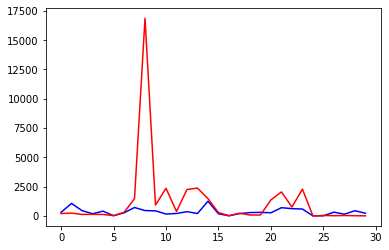

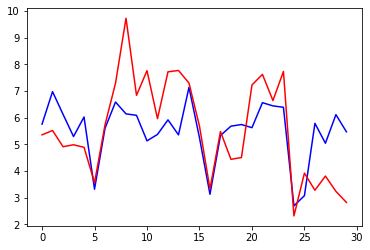

In [218]:
y_pred = xg.predict(X_test)
train_score = xg.score(X_train, y_train.values)
test_score = xg.score(X_test, y_test.values)
print('Training acc:', train_score)
print('Testing acc:', test_score)
train_pred = xg.predict(X_train)

train_mse = mean_squared_error(y_train, train_pred)
print('Train Mean squared error: ', train_mse)
test_mse = mean_squared_error(y_test, y_pred)
print('Test Mean squared error: ', test_mse)

train_mae = mean_absolute_error(y_train, train_pred)
print('Train MAE: ', train_mae)
test_mae = mean_absolute_error(y_test, y_pred)
print('Test MAE: ', test_mae)

plt.plot(np.exp(y_pred), c='b')
plt.plot(np.exp(y_test.values), c='r')
plt.show()

plt.plot(y_pred, c='b')
plt.plot(y_test.values, c='r')
plt.show()

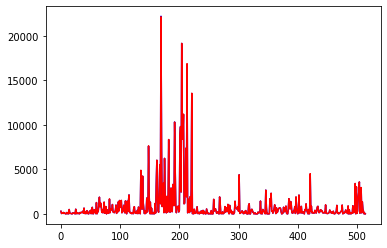

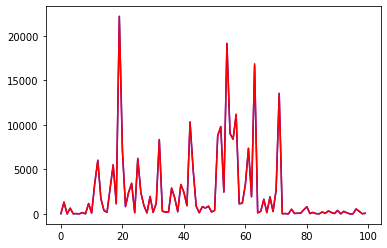

In [129]:
# plot training
plt.plot(np.exp(train_pred), c='b')
plt.plot(np.exp(y_train.values), c='r')
plt.show()

# close up
plt.plot(np.exp(train_pred)[150:250], c='b')
plt.plot(np.exp(y_train.values)[150:250], c='r')
plt.show()

In [201]:
def classify(data):
    if data < 60:
        return 0
    elif data < 250:
        return 1
    elif data < 500:
        return 2
    elif data >= 500:
        return 3
    
def from_log(data):
    return np.exp(data)

In [172]:
y_test.values

array([5.36110435, 5.52321937, 4.91573836, 4.98770779, 4.89462568,
       3.56388296, 5.73618513, 7.29559259, 9.73302154, 6.84308875,
       7.76778461, 5.96737675, 7.72378801, 7.77502382, 7.30257054,
       5.68717873, 3.32970138, 5.48446493, 4.44265126, 4.50931986,
       7.22861339, 7.62847142, 6.64574095, 7.73787791, 2.32042501,
       3.92493923, 3.28316431, 3.81485109, 3.2433733 , 2.8255369 ])

In [202]:
test_result = pd.DataFrame()
test_result['log_y_pred'] = y_pred
test_result['y_pred'] = test_result.log_y_pred.apply(from_log)
test_result['pred_label'] = test_result.y_pred.apply(classify)
test_result['y'] = y_test.values
test_result['y_log'] = test_result.y.apply(from_log)
test_result['true_label'] = test_result.y_log.apply(classify)

In [195]:
test_result.head()

,log_y_pred,y_pred,pred_label,y,y_log,true_label
0,5.762716,318.211512,0,5.361104,212.96,0
1,6.980795,1075.773166,1,5.523219,250.44,0
2,6.130767,459.788623,1,4.915738,136.42,0
3,5.297393,199.815181,0,4.987708,146.60,0
4,6.030373,415.870160,1,4.894626,133.57,0


In [203]:
from sklearn.metrics import classification_report

cr = classification_report(test_result.true_label, test_result.pred_label)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.25      0.29      0.27         7
           2       0.08      0.25      0.12         4
           3       0.83      0.45      0.59        11

    accuracy                           0.40        30
   macro avg       0.54      0.37      0.41        30
weighted avg       0.64      0.40      0.47        30



In [204]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_result.true_label, test_result.pred_label)

Confusion matrix, without normalization
[[4 2 2 0]
 [0 2 5 0]
 [0 2 1 1]
 [0 2 4 5]]


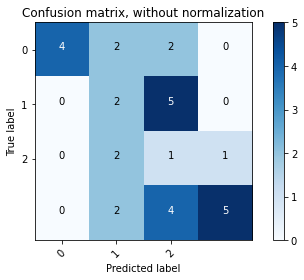

In [205]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=[0,1,2],
                      title='Confusion matrix, without normalization')

In [206]:
# what about with training predictions?
train_result = pd.DataFrame()
train_result['log_y_pred'] = train_pred
train_result['y_pred'] = train_result.log_y_pred.apply(from_log)
train_result['pred_label'] = train_result.y_pred.apply(classify)
train_result['y'] = y_train.values
train_result['y_log'] = train_result.y.apply(from_log)
train_result['true_label'] = train_result.y_log.apply(classify)

In [207]:
cr = classification_report(train_result.true_label, train_result.pred_label)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       116
           1       1.00      0.99      0.99       153
           2       0.97      1.00      0.98        88
           3       1.00      0.99      1.00       158

    accuracy                           0.99       515
   macro avg       0.99      1.00      0.99       515
weighted avg       0.99      0.99      0.99       515



Confusion matrix, without normalization
[[116   0   0   0]
 [  0 151   2   0]
 [  0   0  88   0]
 [  0   0   1 157]]


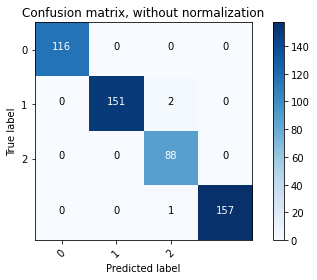

In [208]:
cm = confusion_matrix(train_result.true_label, train_result.pred_label)
plt.figure()
plot_confusion_matrix(cm, classes=[0,1,2],
                      title='Confusion matrix, without normalization')

In [145]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()